In [1]:
from med_associates_utils.session import parse_directory, SessionCollection
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import time
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
import pandas as pd

mpl.rcParams['pdf.fonttype'] = 42

In [2]:
base_path = r'C:\Users\thackray\git\med-associates-utils\sample_data\CRF MedAssoc Files\CRF MedAssoc Files'
data_sources = {
    os.path.join(base_path, "MT - Day 1"): {'Genotype': 'MT', 'Day': 'Day1'},
    os.path.join(base_path, "MT - Day 2"): {'Genotype': 'MT', 'Day': 'Day2'},
    os.path.join(base_path, "MT - Day 3"): {'Genotype': 'MT', 'Day': 'Day3'},
    os.path.join(base_path, "MT - Day 4"): {'Genotype': 'MT', 'Day': 'Day4'},

    os.path.join(base_path, "WT - Day 1"): {'Genotype': 'WT', 'Day': 'Day1'},
    os.path.join(base_path, "WT - Day 2"): {'Genotype': 'WT', 'Day': 'Day2'},
    os.path.join(base_path, "WT - Day 3"): {'Genotype': 'WT', 'Day': 'Day3'},
    os.path.join(base_path, "WT - Day 4"): {'Genotype': 'WT', 'Day': 'Day4'},
}

sessions = SessionCollection()
for path, meta in data_sources.items():
    print(f'reading path "{path}"')
    ss = parse_directory(path)
    ss.update_metadata(meta)
    sessions.extend(ss)

def set_animal_id(session):
    animal_id = re.search("EN#\d+", session.metadata['Subject']).group(0)
    session.metadata['Animal'] = animal_id

sessions.apply(set_animal_id)

reading path "C:\Users\thackray\git\med-associates-utils\sample_data\CRF MedAssoc Files\CRF MedAssoc Files\MT - Day 1"


100%|██████████| 30/30 [00:00<00:00, 1874.55it/s]


reading path "C:\Users\thackray\git\med-associates-utils\sample_data\CRF MedAssoc Files\CRF MedAssoc Files\MT - Day 2"


100%|██████████| 30/30 [00:00<00:00, 1666.28it/s]


reading path "C:\Users\thackray\git\med-associates-utils\sample_data\CRF MedAssoc Files\CRF MedAssoc Files\MT - Day 3"


100%|██████████| 30/30 [00:00<00:00, 1935.18it/s]


reading path "C:\Users\thackray\git\med-associates-utils\sample_data\CRF MedAssoc Files\CRF MedAssoc Files\MT - Day 4"


100%|██████████| 30/30 [00:00<00:00, 1817.84it/s]


reading path "C:\Users\thackray\git\med-associates-utils\sample_data\CRF MedAssoc Files\CRF MedAssoc Files\WT - Day 1"


100%|██████████| 26/26 [00:00<00:00, 1733.05it/s]


reading path "C:\Users\thackray\git\med-associates-utils\sample_data\CRF MedAssoc Files\CRF MedAssoc Files\WT - Day 2"


100%|██████████| 26/26 [00:00<00:00, 2079.83it/s]


reading path "C:\Users\thackray\git\med-associates-utils\sample_data\CRF MedAssoc Files\CRF MedAssoc Files\WT - Day 3"


100%|██████████| 26/26 [00:00<00:00, 1792.88it/s]


reading path "C:\Users\thackray\git\med-associates-utils\sample_data\CRF MedAssoc Files\CRF MedAssoc Files\WT - Day 4"


100%|██████████| 26/26 [00:00<00:00, 1925.62it/s]


In [3]:
sessions.metadata

,StartDate,EndDate,Subject,Experiment,Group,Box,StartTime,StartDateTime,EndTime,MSN,Genotype,Day,Animal
0,2022-05-08,2022-05-08,1_EN#20_1215,20220508,1,4,07:16:07,2022-05-08 07:16:07,08:46:25,CRF,MT,Day1,EN#20
1,2022-05-08,2022-05-08,EN#26_1016,20220508,7,4,17:41:51,2022-05-08 17:41:51,19:11:59,CRF,MT,Day1,EN#26
2,2022-05-08,2022-05-08,EN#76_0924,20220508,7,1,17:41:21,2022-05-08 17:41:21,19:11:54,CRF,MT,Day1,EN#76
3,2022-05-08,2022-05-08,EN#77_0924,20220508,7,2,17:41:27,2022-05-08 17:41:27,19:11:56,CRF,MT,Day1,EN#77
4,2022-05-13,2022-05-13,EN#35_1101,20220513,8,2,12:58:24,2022-05-13 12:58:24,13:54:32,CRF,MT,Day1,EN#35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2023-03-04,2023-03-04,2_EN#50-1125,20230304,2,2,10:05:08,2023-03-04 10:05:08,10:31:15,CRFv2023,WT,Day4,EN#50
220,2023-03-04,2023-03-04,4_EN#33-1012,20230304,4,4,11:10:05,2023-03-04 11:10:05,12:34:00,CRFv2023,WT,Day4,EN#33
221,2023-03-04,2023-03-04,4_EN#44-1126,20230304,4,3,11:39:38,2023-03-04 11:39:38,11:54:45,CRFv2023,WT,Day4,EN#44
222,2023-03-04,2023-03-04,4_EN#31-1012,20230304,4,1,11:45:14,2023-03-04 11:45:14,12:44:01,CRFv2023,WT,Day4,EN#31


In [4]:
sessions.describe()

Number of sessions: 224

Arrays present in data with counts:
(224) "A"
(224) "B"
(224) "C"
(224) "D"
(60) "F"

Scalars present in data with counts:
(224) "R"
(224) "S"




In [5]:
def rename_arrays_by_program(session):
    if session.metadata['MSN'] in ['CRF', 'CRF-Cue2-rewire']:
        session.rename_array('B', 'rewarded_nosepoke')
        session.rename_array('C', 'magazine_entry')
        session.rename_array('D', 'reward_retrieval_latency')

    elif session.metadata['MSN'] == 'CRFv2023':
        session.rename_array('B', 'nosepoke')
        session.rename_array('C', 'magazine_entry')
        session.rename_array('D', 'reward_retrieval_latency')
        session.rename_array('F', 'rewarded_nosepoke')

sessions.apply(rename_arrays_by_program)
sessions.describe()

Number of sessions: 224

Arrays present in data with counts:
(224) "A"
(224) "rewarded_nosepoke"
(224) "magazine_entry"
(224) "reward_retrieval_latency"
(60) "nosepoke"

Scalars present in data with counts:
(224) "R"
(224) "S"




In [6]:
def show_length(session):
    print(session.metadata)
    for k, v in session.arrays.items():
        print(f'{k}: {len(v)}')
    print()
    print()
sessions.apply(show_length)

{'StartDate': datetime.date(2022, 5, 8), 'EndDate': datetime.date(2022, 5, 8), 'Subject': '1_EN#20_1215', 'Experiment': '20220508', 'Group': '1', 'Box': 4, 'StartTime': datetime.time(7, 16, 7), 'StartDateTime': datetime.datetime(2022, 5, 8, 7, 16, 7), 'EndTime': datetime.time(8, 46, 25), 'MSN': 'CRF', 'Genotype': 'MT', 'Day': 'Day1', 'Animal': 'EN#20'}
A: 2
rewarded_nosepoke: 26
magazine_entry: 26
reward_retrieval_latency: 26


{'StartDate': datetime.date(2022, 5, 8), 'EndDate': datetime.date(2022, 5, 8), 'Subject': 'EN#26_1016', 'Experiment': '20220508', 'Group': '7', 'Box': 4, 'StartTime': datetime.time(17, 41, 51), 'StartDateTime': datetime.datetime(2022, 5, 8, 17, 41, 51), 'EndTime': datetime.time(19, 11, 59), 'MSN': 'CRF', 'Genotype': 'MT', 'Day': 'Day1', 'Animal': 'EN#26'}
A: 2
rewarded_nosepoke: 22
magazine_entry: 22
reward_retrieval_latency: 22


{'StartDate': datetime.date(2022, 5, 8), 'EndDate': datetime.date(2022, 5, 8), 'Subject': 'EN#76_0924', 'Experiment': '20220508', 'Gr

In [7]:
event_df = sessions.to_dataframe(include_meta=['Genotype', 'Day', 'Animal', 'Subject'])
event_df

,StartDate,EndDate,Subject,Experiment,Group,Box,StartTime,StartDateTime,EndTime,MSN,Genotype,Day,Animal,event,time
9280,2022-11-06,2022-11-06,7_EN#59-0709,20221106,7,1,13:30:33,2022-11-06 13:30:33,13:46:46,CRF,MT,Day4,EN#59,reward_retrieval_latency,1.39
9893,2023-03-04,2023-03-04,3_EN#61-0101,20230304,3,1,11:23:22,2023-03-04 11:23:22,11:39:53,CRFv2023,MT,Day4,EN#61,reward_retrieval_latency,1.44
17277,2022-11-06,2022-11-06,6_EN#60-0823,20221106,6,2,11:45:51,2022-11-06 11:45:51,11:58:23,CRF,WT,Day4,EN#60,reward_retrieval_latency,1.45
7660,2022-05-16,2022-05-16,EN#26_1220,20220516,9,3,16:39:19,2022-05-16 16:39:19,16:57:17,CRF,MT,Day4,EN#26,reward_retrieval_latency,1.46
7661,2022-05-16,2022-05-16,EN#26_1220,20220516,9,3,16:39:19,2022-05-16 16:39:19,16:57:17,CRF,MT,Day4,EN#26,reward_retrieval_latency,1.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15737,2023-03-03,2023-03-03,4_EN#31-1012,20230303,4,1,10:03:48,2023-03-03 10:03:48,11:33:56,CRFv2023,WT,Day3,EN#31,nosepoke,5385.06
789,2022-11-03,2022-11-03,2_EN#81-0824,20221103,2,3,08:17:06,2022-11-03 08:17:06,09:47:09,CRF,MT,Day1,EN#81,rewarded_nosepoke,5390.22
12257,2022-05-14,2022-05-14,EN#49_1224,20220514,10,3,15:43:35,2022-05-14 15:43:35,17:13:39,CRF,WT,Day2,EN#49,rewarded_nosepoke,5392.14
790,2022-11-03,2022-11-03,2_EN#81-0824,20221103,2,3,08:17:06,2022-11-03 08:17:06,09:47:09,CRF,MT,Day1,EN#81,magazine_entry,5396.94


In [8]:

# max_rewards = 30
# days = sorted(event_df.Day.unique())
# fig, axs = plt.subplots(1, len(days), figsize=(20, 5), sharey=True, sharex=True)
# palette = ['#4f4f4f', '#faae1c'] # sns.color_palette('colorblind', n_colors=2)
# palette_desat = [(*c, '0.3') for c in palette]
# hue_order = ['WT', 'MT']
# day_means = {}

# for ax, day in zip(axs, days):
#     condition = (event_df['event'] == 'rewarded_nosepoke') & (event_df['Day'] == day)
#     for animal in event_df.Subject.unique():
#         sub_condition = condition & (event_df['Subject'] == animal)
#         sns.ecdfplot(data=event_df[sub_condition],
#                      x='time',
#                      hue='Genotype',
#                      stat='count',
#                      hue_order=hue_order,
#                      palette=palette,
#                      alpha=0.1,
#                      ax=ax,
#                      legend=False)
#     ax.set_title(day)
#     ax.set_xlabel('Time (minutes)')
#     ax.set_ylabel('Cumulative Rewards Earned')
#     #ax.set_ylim(0, 30)
#     ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(base=600))
#     formatter = mpl.ticker.FuncFormatter(lambda sec, pos: f'{sec / 60:0.0f}')
#     ax.xaxis.set_major_formatter(formatter)
#     sns.despine(ax=ax)

#     bins = np.arange(90*60)
#     means = {}
#     for g, rows in event_df[condition].groupby('Genotype'):
#         means[g] = []
#         num_animals = len(rows.Subject.unique())
#         for bin in bins:
#             counts = rows[rows['time'] < bin].value_counts('Subject')
#             #counts[counts > max_rewards] = max_rewards
#             means[g].append(counts.sum() / num_animals)
#     day_means[day] = means

#     for k, v in means.items():
#         ax.plot(bins, v, c=palette[hue_order.index(k)], label=k, linewidth=2)

#     mean_df_items = []
#     for d, dv in day_means.items():
#         for g, gv in dv.items():
#             for b, gvv in zip(bins, gv):
#                 mean_df_items.append({
#                     'day': d,
#                     'genotype': g,
#                     'time': b,
#                     'mean_rewarded_nosepokes': gvv
#                 })
#     mean_df = pd.DataFrame(mean_df_items)
#     mean_df.to_csv('mean_curves.tsv', sep='\t', index=False)

#     print(f'Stats for {day}')
#     print(stats.kstest(means['WT'], means['MT']))
#     print(stats.wilcoxon(np.array(means['MT']) - np.array(means['WT'])))
#     print()

#     lr1 = LinearRegression()
#     lr1.fit(bins[:, None], means['WT'])
#     print(f'WT regression: {lr1.coef_}')

#     lr2 = LinearRegression()
#     lr2.fit(bins[:, None], means['MT'])
#     print(f'MT regression: {lr2.coef_}')


# fig.savefig('rewarded_nosepokes_over_days.pdf')
# fig.savefig('rewarded_nosepokes_over_days.png', dpi=600)

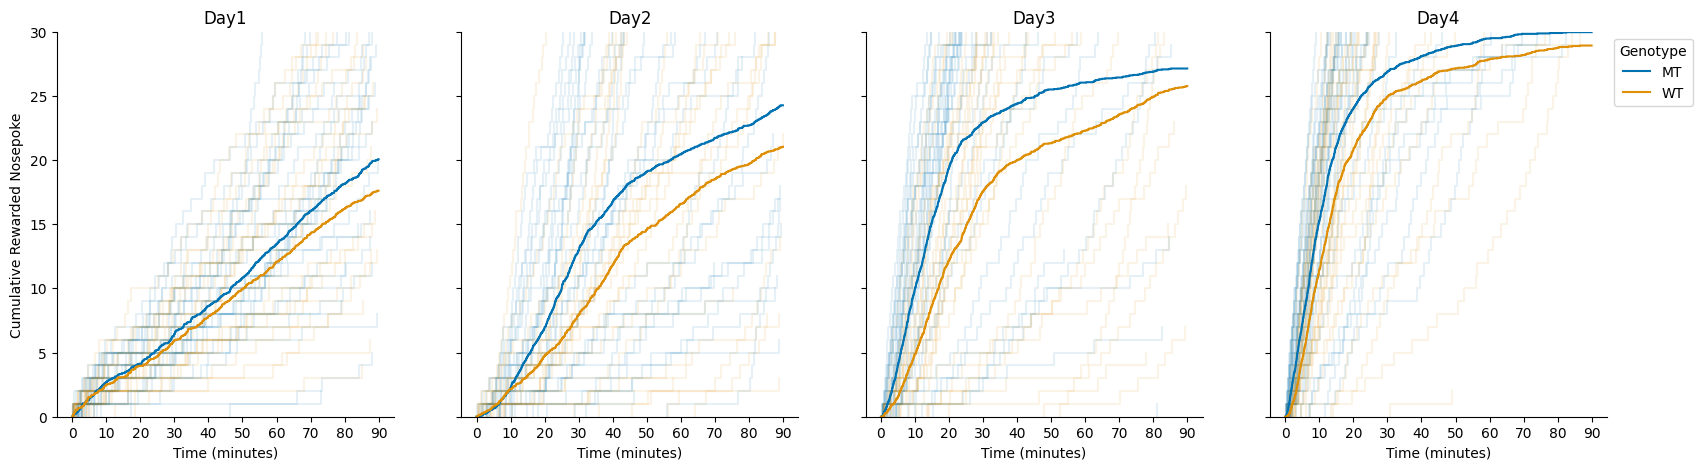

In [11]:
from med_associates_utils.viz import plot_cumulative_events

plot_cumulative_events(event_df, hue='Genotype')

In [10]:
def one_phase_association(x, k, y0, p):
    # https://www.graphpad.com/guides/prism/latest/curve-fitting/reg_exponential_association.htm
    return y0 + (p - y0) * (1 - np.exp(-k * x))

def two_phase_association(x, k_slow, k_fast, y0, p, percent_fast):
    # https://www.graphpad.com/guides/prism/latest/curve-fitting/reg_exponential_association_2phase.htm
    SpanFast = (p - y0) * percent_fast * .01
    SpanSlow = (p - y0) * (100 - percent_fast) * .01
    return y0 + SpanFast * (1 - np.exp(-k_fast * x)) + SpanSlow * (1 - np.exp(-k_slow * x))

for day in day_means.keys():

    for geno in day_means[day].keys():
        y_data = day_means[day][geno]
        x_data = bins
        p0 = None # [1.0, 0.0, 30]
        try:
            popt, pcov = curve_fit(one_phase_association, x_data, y_data, p0=p0)
            print(f'one-phase {day} {geno}: K={popt[0]:0.2E}; Y0={popt[1]:0.2E}; Plateau={popt[2]:0.2E};')
        except:
            print(f'{day} {geno}: failed to find one-phase fit')

        try:
            popt, pcov = curve_fit(two_phase_association, x_data, y_data, p0=p0)
            print(f'two-phase {day} {geno}: K_slow={popt[0]:0.2E}; K_fast={popt[1]:0.2E}; Y0={popt[2]:0.2E}; Plateau={popt[3]:0.2E}; Percent_fast={popt[4]:0.2E};')
        except:
            print(f'{day} {geno}: failed to find two-phase fit')


NameError: name 'day_means' is not defined

{'WT': array([18, 17, 22,  6, 12, 19, 23,  9,  8,  2, 14, 25,  4,  5,  3,  1, 24,
       20, 15, 21, 13,  0, 10, 11,  7, 16], dtype=int64), 'MT': array([22,  8, 26,  4, 19,  5,  7,  1, 23,  9,  0, 17, 24, 21,  6, 27, 18,
       13, 20, 15, 11,  2,  3, 10, 28, 14, 25, 12, 29, 16], dtype=int64)}
14.018691588785137
Day1 WT: 26
Day1 MT: 30
Day2 WT: 25
Day2 MT: 30
Day3 WT: 26
Day3 MT: 30
Day4 WT: 26
Day4 MT: 30


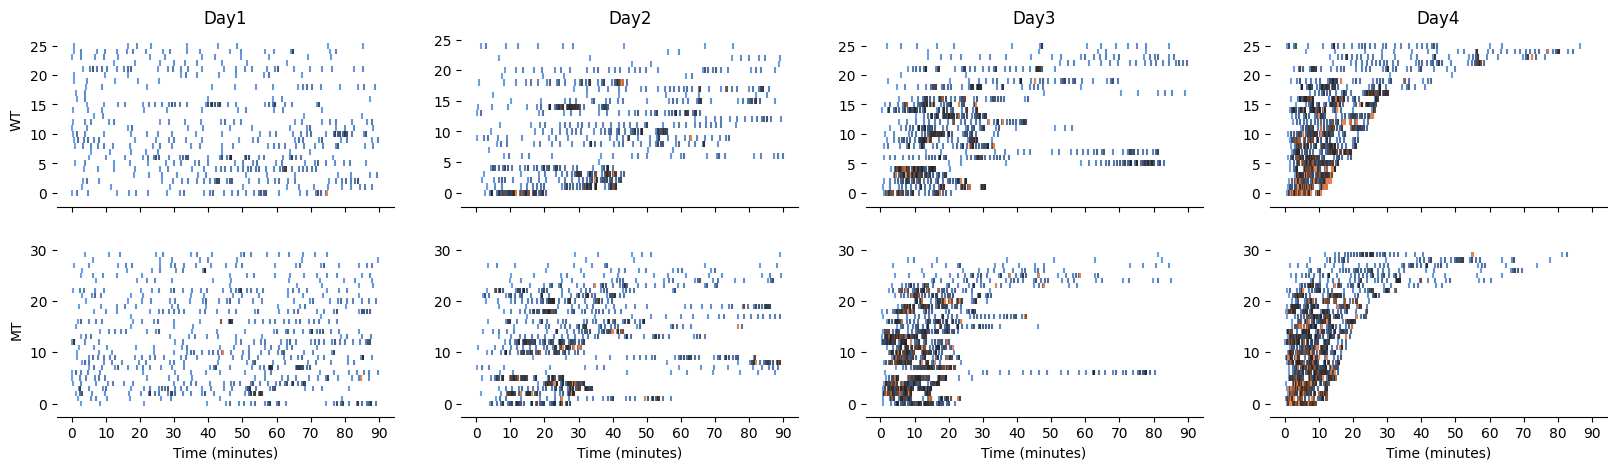

In [ ]:

max_rewards = 30
days = sorted(event_df.Day.unique())
fig, axs = plt.subplots(2, len(days), figsize=(20, 5), sharey=False, sharex=True)
palette = ['#4f4f4f', '#faae1c'] # sns.color_palette('colorblind', n_colors=2)
palette_desat = [(*c, '0.3') for c in palette]
hue_order = ['WT', 'MT']
day_means = {}

raster_events = {day: {geno: [] for geno in hue_order} for day in days}
raster_event_rates = {day: {geno: [] for geno in hue_order} for day in days}
for di, day in enumerate(days):
    condition = (event_df['event'] == 'rewarded_nosepoke') & (event_df['Day'] == day)
    for gi, geno in enumerate(sorted(event_df.Genotype.unique(), reverse=True)):
        sub_condition = condition & (event_df['Genotype'] == geno)
        for animal in sorted(event_df[sub_condition].Subject.unique()):
            sub_sub_condition = sub_condition & (event_df['Subject'] == animal)
            events = event_df[sub_sub_condition]['time'].values
            rate = np.array([0] + list(1 / (np.diff(events) / 60)))

            raster_events[day][geno].append(event_df[sub_sub_condition]['time'].values)
            raster_event_rates[day][geno].append(rate)

sort_day = 'Day4'
sort_orders = {}
for geno, geno_rates in raster_event_rates[day].items():
    summaries = []
    for ai, animal_rates in enumerate(geno_rates):
        #summaries.append(np.median(animal_rates))
        summaries.append(np.max(raster_events[day][geno][ai]))
    sort_orders[geno] = np.argsort(summaries)
print(sort_orders)

max_rate = 0
for day, day_rates in raster_event_rates.items():
    for geno, geno_rates in day_rates.items():
        for animal_rates in geno_rates:
            curr_max = np.max(animal_rates)
            if max_rate < curr_max:
                max_rate = curr_max
print(max_rate)

# Define a diverging color palette using seaborn
palette = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)

# Map from counts to colors
norm = mpl.colors.Normalize(0, 5)  # Update normalization range

for day, day_rates in raster_events.items():
    for geno, geno_rates in day_rates.items():
        print(f"{day} {geno}: {len(geno_rates)}")



for di, day in enumerate(days):
    for gi, geno in enumerate(hue_order):
        ax = axs[gi, di]

        events = raster_events[day][geno]
        events = [events[s] for s in sort_orders[geno] if s < len(events)]

        colors = [[palette(norm(r)) for r in animal] for animal in raster_event_rates[day][geno]]
        colors = [colors[s] for s in sort_orders[geno] if s < len(colors)]

        ax.eventplot(events, colors=colors, orientation="horizontal", zorder=.5)

        if gi == 0:
            ax.set_title(day)
        else:
            ax.set_xlabel('Time (minutes)')

        if di == 0:
            ax.set_ylabel(geno)

        ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(base=600))
        formatter = mpl.ticker.FuncFormatter(lambda sec, pos: f'{sec / 60:0.0f}')
        ax.xaxis.set_major_formatter(formatter)
        sns.despine(ax=ax, left=True)


fig.savefig('raster_rewarded_nosepokes_over_days.pdf')
fig.savefig('raster_rewarded_nosepokes_over_days.png', dpi=600)

In [34]:
cum_event_df = event_df.copy()
for event in ['rewarded_nosepoke']:
    cum_event_df[f'cum_{event}'] = cum_event_df[cum_event_df['event'] == event].sort_values('time').groupby(['Day', 'Subject']).cumcount() + 1

cum_event_df

,StartDate,EndDate,Subject,Experiment,Group,Box,StartTime,StartDateTime,EndTime,MSN,Genotype,Day,Animal,event,time,cum_rewarded_nosepoke
9280,2022-11-06,2022-11-06,7_EN#59-0709,20221106,7,1,13:30:33,2022-11-06 13:30:33,13:46:46,CRF,MT,Day4,EN#59,reward_retrieval_latency,1.39,NaN
9893,2023-03-04,2023-03-04,3_EN#61-0101,20230304,3,1,11:23:22,2023-03-04 11:23:22,11:39:53,CRFv2023,MT,Day4,EN#61,reward_retrieval_latency,1.44,NaN
17277,2022-11-06,2022-11-06,6_EN#60-0823,20221106,6,2,11:45:51,2022-11-06 11:45:51,11:58:23,CRF,WT,Day4,EN#60,reward_retrieval_latency,1.45,NaN
7660,2022-05-16,2022-05-16,EN#26_1220,20220516,9,3,16:39:19,2022-05-16 16:39:19,16:57:17,CRF,MT,Day4,EN#26,reward_retrieval_latency,1.46,NaN
7661,2022-05-16,2022-05-16,EN#26_1220,20220516,9,3,16:39:19,2022-05-16 16:39:19,16:57:17,CRF,MT,Day4,EN#26,reward_retrieval_latency,1.48,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15737,2023-03-03,2023-03-03,4_EN#31-1012,20230303,4,1,10:03:48,2023-03-03 10:03:48,11:33:56,CRFv2023,WT,Day3,EN#31,nosepoke,5385.06,NaN
789,2022-11-03,2022-11-03,2_EN#81-0824,20221103,2,3,08:17:06,2022-11-03 08:17:06,09:47:09,CRF,MT,Day1,EN#81,rewarded_nosepoke,5390.22,20.0
12257,2022-05-14,2022-05-14,EN#49_1224,20220514,10,3,15:43:35,2022-05-14 15:43:35,17:13:39,CRF,WT,Day2,EN#49,rewarded_nosepoke,5392.14,22.0
790,2022-11-03,2022-11-03,2_EN#81-0824,20221103,2,3,08:17:06,2022-11-03 08:17:06,09:47:09,CRF,MT,Day1,EN#81,magazine_entry,5396.94,NaN


In [9]:
from med_associates_utils.proc import calculate_cumulative_events

cum_df = calculate_cumulative_events(event_df, 'rewarded_nosepoke', ['Day', 'Subject'])
cum_df

,StartDate,EndDate,Subject,Experiment,Group,Box,StartTime,StartDateTime,EndTime,MSN,Genotype,Day,Animal,time,cum_rewarded_nosepoke
7686,2022-05-16,2022-05-16,EN#26_1220,20220516,9,3,16:39:19,2022-05-16 16:39:19,16:57:17,CRF,MT,Day4,EN#26,7.75,1
10362,2022-05-13,2022-05-13,EN#98_0115,20220513,8,3,13:07:45,2022-05-13 13:07:45,14:37:49,CRF,WT,Day1,EN#98,7.88,1
11144,2022-11-03,2022-11-03,6_EN#60-0823,20221103,6,2,15:04:33,2022-11-03 15:04:33,16:19:17,CRF,WT,Day1,EN#60,8.84,1
405,2022-05-13,2022-05-13,EN#26_1220,20220513,9,3,14:38:30,2022-05-13 14:38:30,16:16:51,CRF,MT,Day1,EN#26,9.69,1
740,2022-11-03,2022-11-03,2_EN#81-0824,20221103,2,3,08:17:06,2022-11-03 08:17:06,09:47:09,CRF,MT,Day1,EN#81,9.84,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10586,2022-11-03,2022-11-03,1_EN#69-0630,20221103,1,1,06:36:45,2022-11-03 06:36:45,08:09:05,CRF,WT,Day1,EN#69,5376.90,24
209,2022-05-08,2022-05-08,EN#77_0924,20220508,7,2,17:41:27,2022-05-08 17:41:27,19:11:56,CRF,MT,Day1,EN#77,5377.06,8
15736,2023-03-03,2023-03-03,4_EN#31-1012,20230303,4,1,10:03:48,2023-03-03 10:03:48,11:33:56,CRFv2023,WT,Day3,EN#31,5382.62,18
789,2022-11-03,2022-11-03,2_EN#81-0824,20221103,2,3,08:17:06,2022-11-03 08:17:06,09:47:09,CRF,MT,Day1,EN#81,5390.22,20


<Axes: xlabel='time', ylabel='cum_rewarded_nosepoke'>

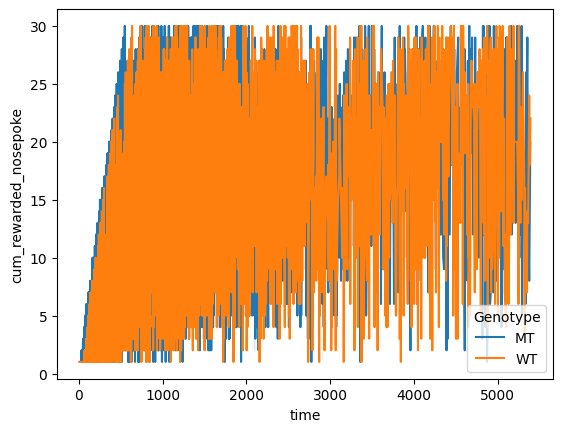

In [10]:
sns.lineplot(data=cum_df, x='time', y='cum_rewarded_nosepoke', hue='Genotype')